<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310 - Lecture 5

## <font color='navy'>Monte Carlo Simulations</font>

The main goal is to solve problems of data science by approximating probability values via carefully designed simulations. 

<font color='green'>**Critical Thinking**</font>: we want to be problem solvers and we can address many practical questions by using repeated sampling from known distributions along with carefully qualified mathematical considerations.

### <font color='darkpink'> The Monty Hall Problem


### Suppose you are on a game show, and you have the choice of picking one of three doors: Behind one door is a car; behind the other doors, goats. You pick a door, let’s say door 1, and the host, who knows what’s behind the doors, opens another door, say door 3, which has a goat. The host then asks you: do you want to stick with your choice or choose another door?

The good news is that the space of all possible outcomes is certainly finite and can be easily summarized:

<font face='Menlo' color='darkblue'>

You Pick |	Prize Door |	Don’t Switch |	Switch
---:|---:|---:|---:
1|1|Win|Lose
1|2|Lose|Win
1|3|Lose|Win
2|1|Lose|Win
2|2|Win|Lose
2|3|Lose|Win
3|1|Lose|Win
3|2|Lose|Win
3|3|Win|Lose
  |  | 3 Wins (33%) | 6 Wins (66%) </font>

Winning probability if you always switch: 0.6693333333333333
Winning probability if you always stick to your original choice: 0.33066666666666666


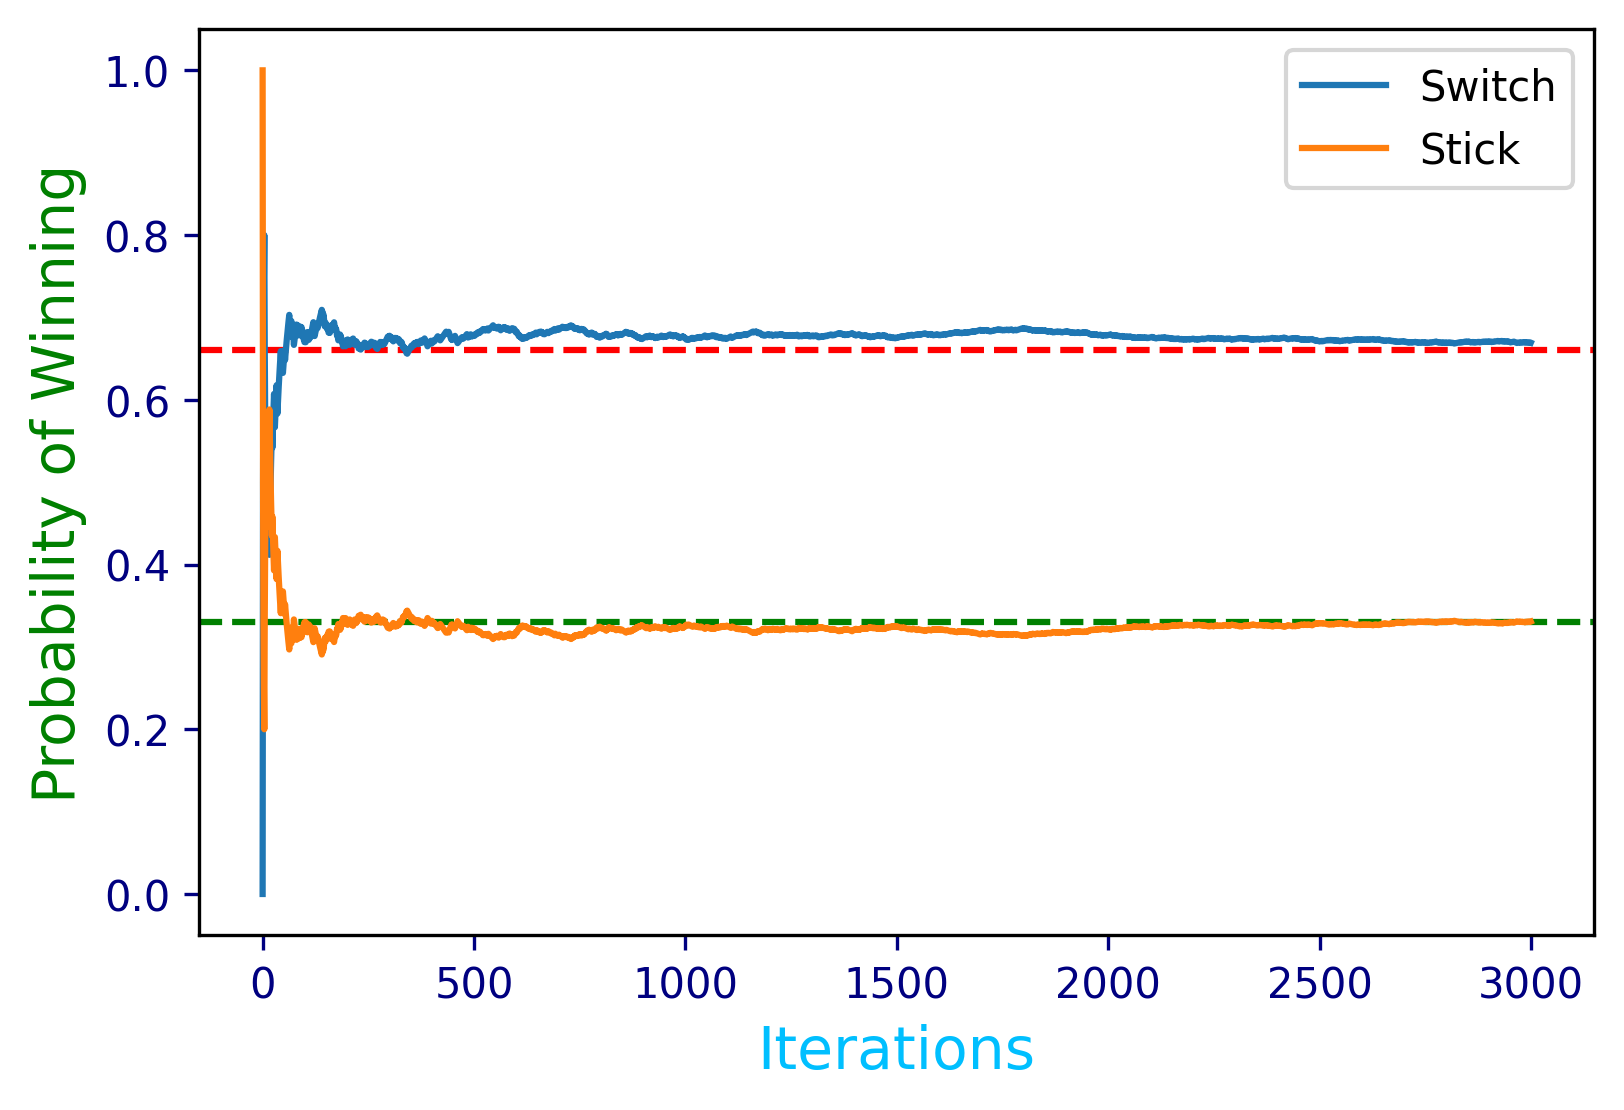

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

import random
import matplotlib.pyplot as plt

doors = ["goat","goat","car"]

# approximated results
switch_win_probability = []
stick_win_probability = []

plt.axhline(y=0.66, color='red', linestyle='--')
plt.axhline(y=0.33, color='green', linestyle='--')

def monte_carlo(n):

  switch_wins = 0
  stick_wins = 0

  for i in range(n):
     random.shuffle(doors)

     k = random.randrange(3)

     if doors[k] != 'car':
       switch_wins +=1
    
     else:
       stick_wins +=1
    
     switch_win_probability.append(switch_wins/(i+1))
     stick_win_probability.append(stick_wins/(i+1))
    
  plt.plot(switch_win_probability,label='Switch')
  plt.plot(stick_win_probability,label='Stick')
  plt.tick_params(axis='x', colors='navy')
  plt.tick_params(axis='y', colors='navy')
  plt.xlabel('Iterations',fontsize=14,color='DeepSkyBlue')
  plt.ylabel('Probability of Winning',fontsize=14,color='green')
  plt.legend()
  print('Winning probability if you always switch:', switch_win_probability[-1])
  print('Winning probability if you always stick to your original choice:', stick_win_probability[-1])

monte_carlo(3000)

## Estimating $\pi$ by using intuitive geometry and Monte Carlo simulations

Critical Thinking: we image having a circle inscribed in a square. This means that the radius of the circle is half of the side of the square. The area of the circle is $\pi\cdot (\frac{x}{2})^2 =\frac{\pi\cdot x^2}{4} $ and we also know that the area of the square is $x^2$. So, the ratio between the area of the circle and the area of this square is $\frac{\pi}{4}.$ 

Critical Thinking: we are going to "throw darts" at the square and we are going to count the hits inside the circle versus the overall number of hits inside the square.

In [2]:
!pip3 install ColabTurtle

3.276


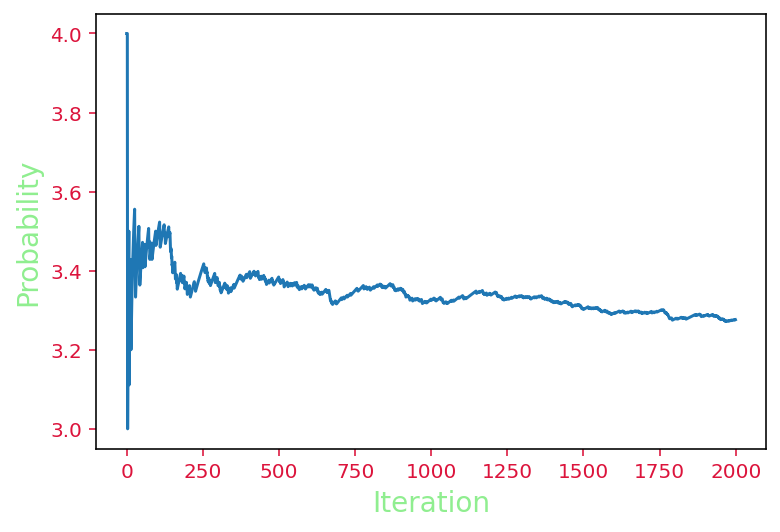

In [3]:
import ColabTurtle.Turtle
import random
import matplotlib.pyplot as plt
from math import pi
import numpy as np

# To visualize the random points
myPen = ColabTurtle.Turtle
myPen.initializeTurtle()


#myPen.hideturtle()

myPen.speed(5)
myPen.bgcolor("white")

myPen.penup()

myPen.goto(250,120)


myPen.color('blue')
myPen.pendown()
myPen.backward(250)
myPen.right(90)
myPen.forward(250)
myPen.left(90)
myPen.forward(250)
myPen.left(90)
myPen.forward(250)

# critical thinking: where is the center of the square?
myPen.color('red')
myPen.penup()
myPen.goto(378,122)
myPen.pendown()
myPen.forward(1)


def pcircle(radius):

    c = 2 * pi * radius

    #n = amount of lines or corners, it defines the accuracy of the circle
    n = 390 # lower number to decrease drawing time (can be any float or int)

    #circumference (c) = ca.  l * n
    #l = length of individual lines 
    l = 2*np.sin(pi/n)*radius
    regular_polygon(int(np.round(l)),n)


def regular_polygon(l, n):
    """draws a regular polygon of n amount sides of length l
    that is supposed to appear like a circle.
    function by cdlane from a stackoverflow post"""
    for _ in range(n):
        myPen.forward(l)
        myPen.left(360 / n)
myPen.speed(10)
pcircle(128)


in_circle = 0
out_circle = 0

pi_values = []

for i in range(1):
  for j in range(2000):

    x = random.randrange(250,500)
    y = random.randrange(120,370)

    # check if the number lies outside the circle
    if (x-375)**2+(y-245)**2>125.75**2:
      myPen.color('blue')
      myPen.penup()
      myPen.goto(x-1,y)
      myPen.pendown()
      myPen.forward(1)
      out_circle = out_circle + 1

    else:
      myPen.color('red')
      myPen.penup()
      myPen.goto(x,y)
      myPen.pendown()
      myPen.forward(1)
      in_circle = in_circle + 1

    approx_pi = 4.0 * in_circle / (in_circle + out_circle)
    pi_values.append(approx_pi)


  plt.plot(pi_values)
  plt.tick_params(axis='x', colors='crimson')
  plt.tick_params(axis='y', colors='crimson')
  plt.xlabel('Iteration',fontsize=14,color='lightgreen')
  plt.ylabel('Probability',fontsize=14,color='lightgreen')

  avg_pi_errors = [abs(pi-approx_pi) for approx_pi in pi_values]

print(pi_values[-1])

3.1588


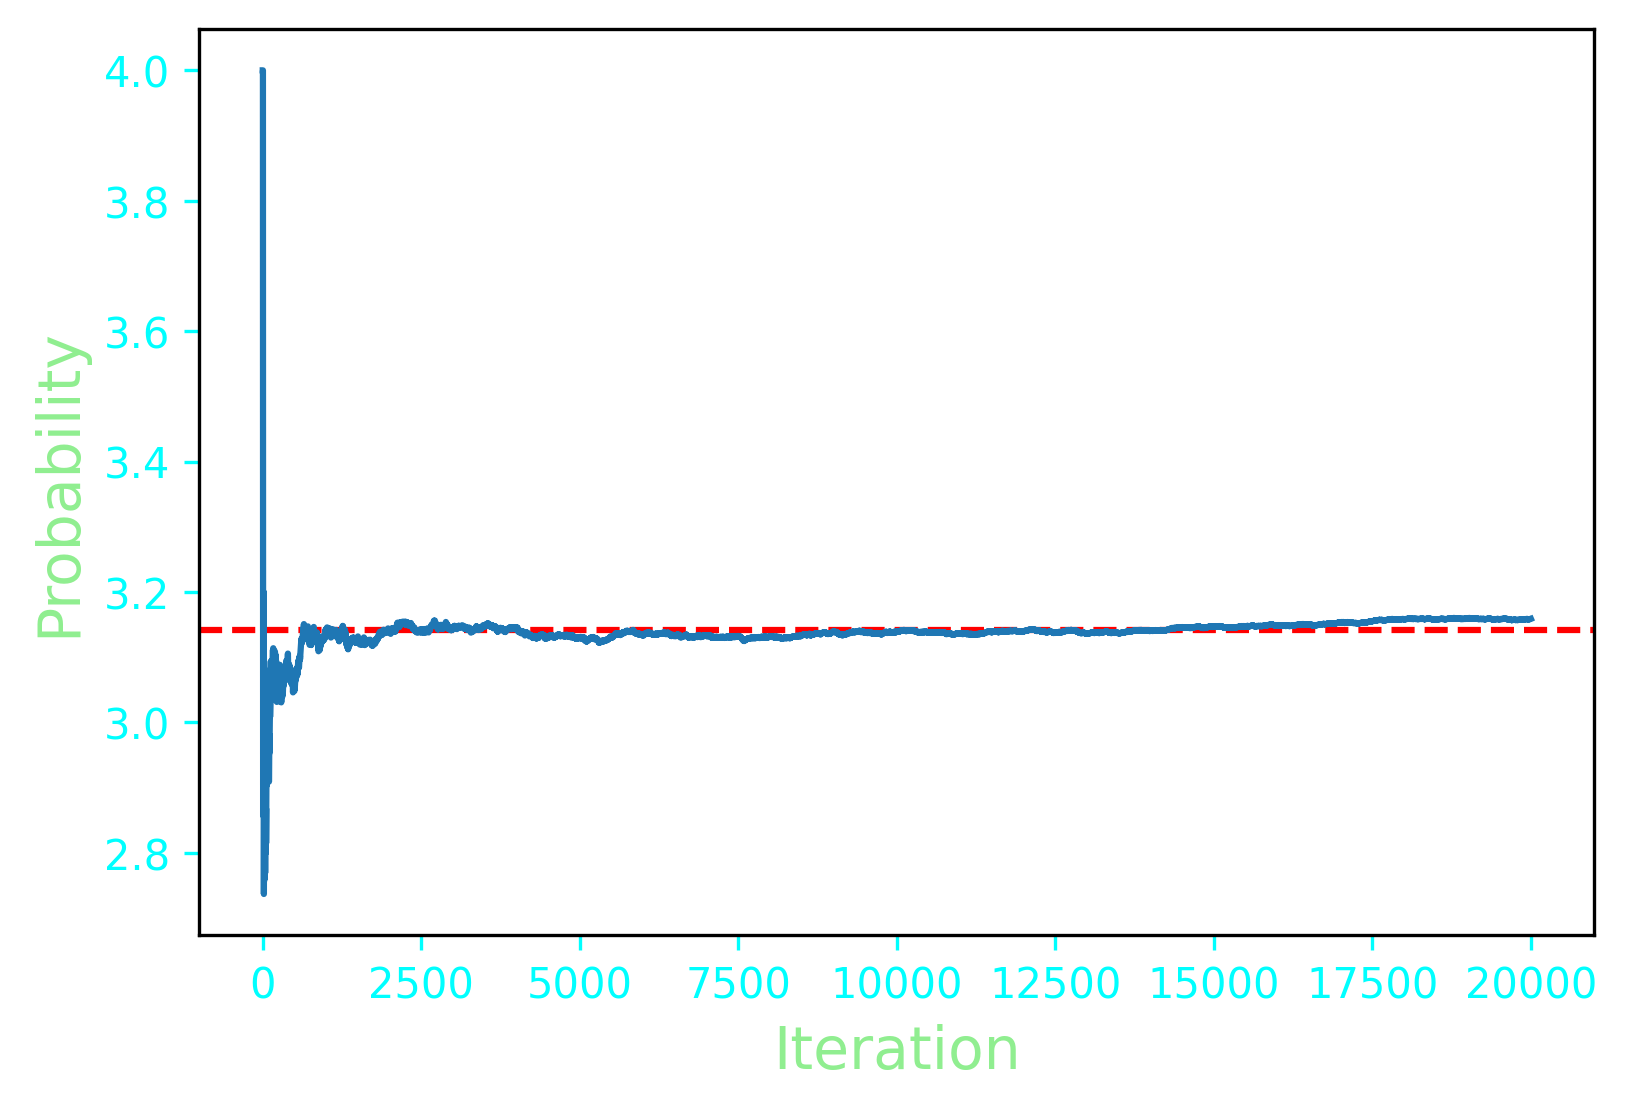

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

import random
import matplotlib.pyplot as plt
from math import pi



pi_values = []

def monte_carlo(n):
  in_circle = 0
  out_circle = 0
  for j in range(n):
    x = random.randrange(250,500)
    y = random.randrange(120,370)

    # check if the number lies outside the circle
    if (x-375)**2+(y-245)**2>125**2:
      out_circle = out_circle + 1
    else:
      in_circle = in_circle + 1

    approx_pi = 4.0 * in_circle / (in_circle + out_circle)
    pi_values.append(approx_pi)
    
  return pi_values

pi_values = monte_carlo(20000)
plt.axhline(y=pi,color='red',linestyle='--')
plt.plot(pi_values)
plt.tick_params(axis='x', colors='cyan')
plt.tick_params(axis='y', colors='cyan')
plt.xlabel('Iteration',fontsize=14,color='lightgreen')
plt.ylabel('Probability',fontsize=14,color='lightgreen')

answer = pi_values[-1]
print(answer)

## Fun problem to think about:

You're about to get on a plane to Seattle. You want to know  if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it's raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that "Yes" it is raining. What is the probability that it's actually raining in Seattle?
